<a href="https://colab.research.google.com/github/shoumyasingh/Artificial_Intelligence_python/blob/main/q6_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Importing Libraries & Importing the Dataset

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_csv('irisdata.csv')
# Assign colum names to the dataset
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'Species(label)']
dataset


,5.1,3.5,1.4,0.2,setosa
0,4.9,3.0,1.4,0.2,setosa
1,6.6,2.9,4.6,1.3,versicolor
2,5.2,2.7,3.9,1.4,versicolor
3,6.9,3.1,5.1,2.3,virginica
4,5.8,2.7,5.1,1.9,virginica
5,7.0,3.2,4.7,1.4,versicolor
6,5.0,3.3,1.4,0.2,setosa
7,5.9,3.0,5.1,1.8,virginica


[[0 1 0]
 [0 0 0]
 [0 1 0]]
              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00       1.0
  versicolor       0.00      0.00      0.00       0.0
   virginica       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

Text(0, 0.5, 'Mean Error')

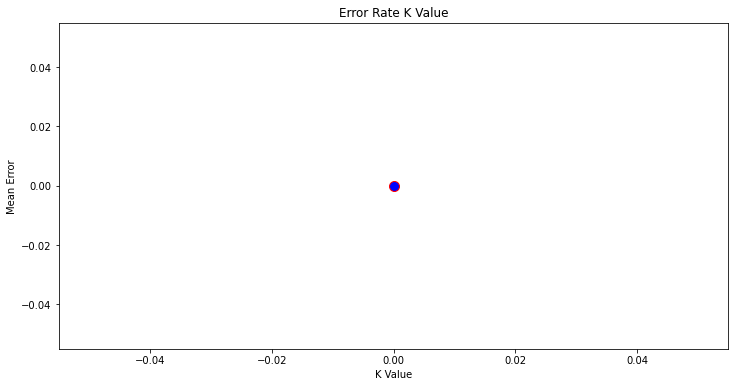

In [17]:
# Preprocessing

X = dataset.iloc[:, :-1].values         # Assign 1st/2nd/3rd/4th colums values to X
y = dataset.iloc[:, 4].values           # Assign 5th column values to y

"""
    Train Test Split
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)   # training set: 80%

"""
    Feature Scaling
"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

"""
    Training and Predictions
"""
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

"""
    Evaluating the Algorithm
"""
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred)) #https://www.youtube.com/watch?v=Kdsp6soqA7o
print(classification_report(y_test, y_pred))

"""
    Comparing Error Rate with the K Value
"""
error = []

# Calculating error for K values 1 

knn = KNeighborsClassifier(n_neighbors=1)   # K = 1 
knn.fit(X_train, y_train)
pred_i = knn.predict(X_test)
error.append(np.mean(pred_i != y_test))


plt.figure(figsize=(12, 6))
plt.plot(error, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')